In [97]:
# fig_generator.ipynb
# Avery Krieger 05/16/2023

# this allows you to edit src code and run 
# (the alternative is to restart the kernel EVERY time you make a change to src...BAD)
%load_ext autoreload
%autoreload 2

from visanalysis.analysis import imaging_data, shared_analysis
from visanalysis.util import plot_tools

from matplotlib import pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
from scipy import stats

import os
from pathlib import Path
import numpy as np
import seaborn as sns
import pandas as pd

# Multiple ROIs
# Fly 1
mi1_fly1_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20221122.common_moco", "2022-11-22", "3", "proximal_multiple"]]
mi1_fly1_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20221122.common_moco", "2022-11-22", "3", "medial_multiple"]]
mi1_fly1_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20221122.common_moco", "2022-11-22", "3", "distal_multiple"]]
# Fly 2
mi1_fly2_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20221129.common_moco", "2022-11-29", "4", "proximal_multiple3"]]
mi1_fly2_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20221129.common_moco", "2022-11-29", "4", "medial_multiple_sub2"]] #also 'medial_multiple_sub1", "medial_multiple_sub2"
mi1_fly2_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20221129.common_moco", "2022-11-29", "4", "distal_multiple"]]
# Fly 3
mi1_fly3_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230216", "2023-02-16", "5", "mi1_proximal_multiple"]]
mi1_fly3_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20230216", "2023-02-16", "5", "mi1_medial_multiple"]] #also 'medial_multiple_sub1", "medial_multiple_sub2"
mi1_fly3_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230216", "2023-02-16", "5", "mi1_distal_multiple"]]
# Fly 4 #less good
mi1_fly4_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230223.moco", "2023-02-23", "6", "mi1_proximal_multiple"]]
mi1_fly4_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20230223.moco", "2023-02-23", "6", "mi1_medial_multiple"]] 
mi1_fly4_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230223.moco", "2023-02-23", "6", "mi1_distal_multiple"]]
# Fly 5 #less good
mi1_fly5_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230223.moco", "2023-02-23", "8", "mi1_proximal_multiple"]]
mi_fly5_prox_double = [["/Volumes/ABK2TBData/data_repo/bruker/20230223.moco", "2023-02-23", "8", "mi1_proximal_multiple_double"]]
mi1_fly5_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20230223.moco", "2023-02-23", "8", "mi1_medial_multiple"]] 
mi1_fly5_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230223.moco", "2023-02-23", "8", "mi1_distal_multiple"]]
# Fly 6 (moco)
mi1_fly6_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230302", "2023-03-02", "8", "mi1_proximal_multiple"]]
mi1_fly6_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20230302", "2023-03-02", "8", "mi1_medial_multiple"]]
mi1_fly6_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230302", "2023-03-02", "8", "mi1_distal_multiple"]]
# Fly 7 (only prox, kind of medial)
mi1_fly7_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230302", "2023-03-02", "2", "mi1_proximal_multiple"]]
# Fly 8 (prox only) lotta motion
mi1_fly8_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230302", "2023-03-02", "6", "mi1_proximal_multiple"]]
# Fly 9
mi1_fly9_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230316", "2023-03-16", "4", "mi1_proximal_multiple"]]
mi1_fly9_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20230316", "2023-03-16", "4", "mi1_medial_multiple"]]
mi1_fly9_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230316", "2023-03-16", "4", "mi1_distal_multiple"]]
# Fly 10
mi1_fly10_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230316", "2023-03-16", "6", "mi1_proximal_multiple"]]
mi1_fly10_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20230316", "2023-03-16", "6", "mi1_medial_multiple"]]
mi1_fly10_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230316", "2023-03-16", "6", "mi1_distal_multiple_lowcon"]]
# Fly 11
mi1_fly11_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230316", "2023-03-16", "7", "mi1_proximal_multiple"]]
# Fly 12
mi1_fly12_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230317", "2023-03-17", "1", "mi1_proximal_multiple"]]
mi1_fly12_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20230317", "2023-03-17", "1", "mi1_medial_multiple"]]
mi1_fly12_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230317", "2023-03-17", "1", "mi1_distal_multiple"]]
# Fly 13 # kinda shitty b/c motion
mi1_fly13_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230317", "2023-03-17", "2", "mi1_proximal_multiple"]]
# Fly 14 # kinda shitty b/c motion
mi1_fly14_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230317", "2023-03-17", "3", "mi1_proximal_multiple"]]
# Fly 15
mi1_fly15_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230403.moco", "2023-04-03", "1", "mi1_proximal_multiple"]]
# Fly 16
mi1_fly16_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230403.moco", "2023-04-03", "3", "mi1_proximal_multiple"]]
# Fly 17
mi1_fly17_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230403.moco", "2023-04-03", "4", "mi1_proximal_multiple"]]
# Fly 18
mi1_fly18_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230427.moco", "2023-04-27", "1", "mi1_proximal_multiple"]]
# Fly 19
mi1_fly19_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230427.moco", "2023-04-27", "2", "mi1_proximal_multiple"]]
# Fly 20
mi1_fly20_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230427.moco", "2023-04-27", "3", "mi1_proximal_multiple"]]
# Fly 21
mi1_fly21_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230427.moco", "2023-04-27", "5", "mi1_proximal_multiple"]]
# Fly 22 #5/09/23
mi1_fly22_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230509.selected", "2023-05-09", "3", "mi1_proximal_multiple"]]
mi1_fly22_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230509.selected", "2023-05-09", "3", "mi1_distal_multiple"]]
# Fly 23 #5/09/23
mi1_fly23_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230509.selected", "2023-05-09", "4", "mi1_proximal_multiple"]]
mi1_fly23_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230509.selected", "2023-05-09", "4", "mi1_distal_multiple"]]
# Fly 24 #5/09/23
mi1_fly24_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230509.selected", "2023-05-09", "5", "mi1_proximal_multiple"]]
mi1_fly24_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230509.selected", "2023-05-09", "5", "mi1_distal_multiple"]]


# CONTROL FLIES
# control fly 1 - several ROI name options here: mi1_proximal_multiple_lessbi mi1_proximal_multiple_morebi
mi1_control1_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230317", "2023-03-17", "4", "mi1_proximal_multiple_morebi"]]
mi1_control1_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20230317", "2023-03-17", "4", "mi1_medial_multiple"]]
mi1_control1_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230317", "2023-03-17", "4", "mi1_distal_multiple"]]
# control fly 2
mi1_control2_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230317", "2023-03-17", "5", "mi1_proximal_multiple"]]
# control fly 3
mi1_control3_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230509.selected", "2023-05-09", "1", "mi1_proximal_multiple"]]
mi1_control3_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230509.selected", "2023-05-09", "1", "mi1_distal_multiple"]]
# control fly 4
mi1_control4_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230509.selected", "2023-05-09", "2", "mi1_proximal_multiple"]]
# control fly 5
mi1_control5_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230509.selected", "2023-05-09", "6", "mi1_proximal_multiple"]]
mi1_control5_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230509.selected", "2023-05-09", "6", "mi1_distal_multiple"]]




mi1_prox_all = np.concatenate(
                             (mi1_fly1_prox, mi1_fly2_prox, mi1_fly3_prox, 
                             mi1_fly4_prox, mi1_fly5_prox, mi1_fly6_prox,
                             mi1_fly7_prox, mi1_fly8_prox, mi1_fly9_prox,
                             mi1_fly10_prox, mi1_fly11_prox, mi1_fly12_prox,
                             mi1_fly13_prox, mi1_fly14_prox, mi1_fly15_prox,
                             ), 
                             axis = 0,
                            )

mi1_prox_goodish = np.concatenate(
                             (mi1_fly4_prox, mi1_fly5_prox, mi1_fly6_prox,
                             mi1_fly7_prox, mi1_fly8_prox, mi1_fly9_prox,
                             mi1_fly10_prox, mi1_fly11_prox, mi1_fly12_prox,
                             mi1_fly13_prox, mi1_fly14_prox, mi1_fly15_prox, 
                             mi1_fly16_prox, mi1_fly17_prox, mi1_fly18_prox,
                             mi1_fly19_prox, mi1_fly20_prox, mi1_fly21_prox,),
                             axis = 0,
                             )

mi1_prox_good = np.concatenate(
                             (mi1_fly6_prox, mi1_fly8_prox, mi1_fly16_prox, mi1_fly17_prox,
                              mi1_fly18_prox, mi1_fly19_prox, mi1_fly20_prox, mi1_fly21_prox,
                              mi1_fly22_prox, mi1_fly23_prox, mi1_fly24_prox,),
                             axis = 0,
                             )

fly_list_prox = [6, 8, 16, 17, 18, 19, 20, 21, 22, 23, 24]

mi1_dist_good = np.concatenate(
                             (mi1_fly6_dist, mi1_fly22_dist, mi1_fly23_dist, mi1_fly24_dist,
                             ),
                             axis = 0,
                             )
fly_list_dist = [6, 22, 23, 24]

mi1_medi_good = np.concatenate(
                             (mi1_fly6_medi,
                             ),
                             axis = 0,
                             )
fly_list_medi = [6]
                             
mi1_medi_all = np.concatenate(
                       (mi1_fly1_medi, mi1_fly2_medi, mi1_fly3_medi,mi1_fly4_medi, mi1_fly5_medi, mi1_fly6_medi,), 
                        axis = 0,
                      )
mi1_dist_all = np.concatenate(
                       (mi1_fly1_dist, mi1_fly2_dist, mi1_fly3_dist, mi1_fly4_dist, mi1_fly5_dist, mi1_fly6_dist,), 
                        axis = 0,
                      )
mi1_all_multiple = np.concatenate(
                                  (mi1_fly1_prox, mi1_fly2_prox, mi1_fly3_prox, mi1_fly4_prox, mi1_fly5_prox, mi1_fly6_prox, 
                                   mi1_fly1_medi, mi1_fly2_medi, mi1_fly3_medi, mi1_fly4_medi, mi1_fly5_medi, mi1_fly6_medi,
                                   mi1_fly1_dist, mi1_fly2_dist, mi1_fly3_dist, mi1_fly4_dist, mi1_fly5_dist, mi1_fly6_dist,),
                                   axis = 0,
                                 )

# control flies
mi1_control_prox = np.concatenate(
                                  (mi1_control1_prox, mi1_control2_prox, mi1_control3_prox, mi1_control4_prox, mi1_control5_prox,),
                                  axis = 0,
                                 )
fly_list_control_prox = [1, 2, 3, 4, 5]

mi1_control_dist = np.concatenate(
                                  (mi1_control1_prox, mi1_control3_prox, mi1_control5_prox,),
                                  axis = 0,
                                 )
fly_list_control_dist = [1, 3, 5]

fly_list_control_medi = [1]

# all good flies
mi1_all_good = [mi1_prox_good, mi1_medi_good, mi1_dist_good]

#all flies for mi1_control
mi1_control_all = [mi1_control_prox, mi1_control1_medi, mi1_control1_dist]

# Hardcoded fly indecies. Must be updated above when fly identies added/changed:
fly_list_exp = [fly_list_prox, fly_list_medi, fly_list_dist]
fly_list_control = [fly_list_control_prox, fly_list_control_medi, fly_list_control_dist]
layer_list = ('Proximal', 'Medial', 'Distal')

# Housekeeping:
condition_name = 'current_led_intensity'
save_directory = "/Volumes/ABK2TBData/lab_repo/analysis/outputs/flash_w_opto_step/" #+ experiment_file_name + "/"
Path(save_directory).mkdir(exist_ok=True)

def visFlash(ID):
    pre_time = ID.getRunParameters('pre_time')
    flash_times = ID.getRunParameters('flash_times')
    flash_width = ID.getRunParameters('flash_width')
    
    flash_start = flash_times + pre_time
    flash_end = flash_start + flash_width
    
    return flash_start, flash_end

def convertRGBtoFraction(R_value, G_Value, B_Value):
    R_Fraction = R_value/255
    G_Fraction = G_Value/255
    B_Fraction = B_Value/255

    return (R_Fraction, G_Fraction, B_Fraction)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Plotting Function tests

In [98]:
def config_matplotlib():
    plt.rcParams['svg.fonttype'] = 'none'
    plt.rcParams.update({'font.family': 'sans-serif'})
    plt.rcParams.update({'font.sans-serif': 'Helvetica'})

config_matplotlib()

paleDarkBlue = convertRGBtoFraction(82, 63, 232)

# Determine percentage values of opto
opto_1 = ((0.25/4)*100)
opto_2 = ((1/4)*100)
opto_3 = ((4/4)*100)
opto_values = (str(opto_1)+'%', str(opto_2)+'%', str(opto_3)+'%')

In [180]:
def plotFlashWithOptoStepTrial(which_layer, save_fig=False):
    file_path = os.path.join(which_layer[0], which_layer[1] + ".hdf5")
    ID = imaging_data.ImagingDataObject(file_path, which_layer[2], quiet=True)
    roi_data = ID.getRoiResponses(which_layer[3])
    unique_parameter_values, mean_response, sem_response, trial_response_by_stimulus = ID.getTrialAverages(roi_data.get('epoch_response'), parameter_key='current_led_intensity')

    # Calculate the mean and SEM of mean_response across ROIs
    cross_roi_mean_response = np.mean(mean_response, axis=0)
    cross_roi_sem_response = np.std(mean_response, axis=0) / np.sqrt(mean_response.shape[0])
    cross_roi_sem_plus = cross_roi_mean_response + cross_roi_sem_response
    cross_roi_sem_minus = cross_roi_mean_response - cross_roi_sem_response

    # finding vis flash locations 
    flash_start, flash_end = visFlash(ID)
    min_val = np.min(cross_roi_sem_minus.mean(axis=0))
    max_val = np.max(cross_roi_sem_plus.mean(axis=0))
    y_low = min_val-abs(0.1*min_val)
    y_high = max_val+abs(0.25*max_val)


    # Figure plotting!
    cmap = plt.get_cmap('cool') # also 'cool' 'winter' 'PRGn' 'Pastel1' 'YlGnBu' 'twilight'
    colors = [cmap(i) for i in np.linspace(0.1, 1.0, len(unique_parameter_values))]

    fh, ax = plt.subplots(1, 1, figsize=(16, 8))
    # Plotting function stuff
    plot_tools.cleanAxes(ax)

    # Plotting the mean response across ROIs
    for up_ind, up in enumerate(unique_parameter_values): # up = unique parameter
        ax.plot(roi_data['time_vector'], cross_roi_mean_response[up_ind, :], color=colors[up_ind], alpha=0.9, label=opto_values[up_ind])
        ax.fill_between(roi_data['time_vector'], cross_roi_sem_plus[up_ind, :], 
                        cross_roi_sem_minus[up_ind, :],
                        color=colors[up_ind], alpha=0.2)
        
    # OPTO stim plotting
    led_start_time = ID.getRunParameters('pre_time')+ID.getRunParameters('led_time')
    led_end_time = led_start_time + ID.getRunParameters('led_duration')        
    ax.fill_between([led_start_time, led_end_time], y_low*1.3, y_high*1.01, 
                    alpha=0.1, edgecolor='r', facecolor='r', linewidth=3,)
    
    # VISUAL flash stim plotting
    for vis_ind in range(len(flash_start)):
        ax.arrow(flash_start[vis_ind], y_high, 
                 0, y_high*-0.05, 
                 width=0.1,
                 head_length=0.05,
                 color=paleDarkBlue,
                 )

    # Legend, Grid, Axis
    ax.legend(loc="upper right", fontsize=10, frameon=False, title='Opto Intensity', title_fontsize=12)
    ax.set_xlabel('Time in Seconds')
    ax.set_ylabel('DF/F')
    ax.set_title(f'{which_layer[1]} Series: {which_layer[2]} | Conditions: {condition_name} | ROI={which_layer[3]}', fontsize=20)
    # add scalebar from Max's visanalysis/visanalysis/util/plot_tools.py
    plot_tools.addScaleBars(ax, dT=2, dF=0.5, T_value=-0.1, F_value=-0.4)

    fh.set_tight_layout(True)


    if save_fig == True:
        fh.savefig(
        save_directory
        + "4B.AverageTraces"
        + str(which_layer[1])
        + ".Series"
        + str(which_layer[2])
        + ".ROI"
        + str(which_layer[3])
        + ".Conditions:"
        + str(condition_name)
        + ".pdf",
        dpi=300, bbox_inches='tight', transparent=True,
        )

## Call the plot function

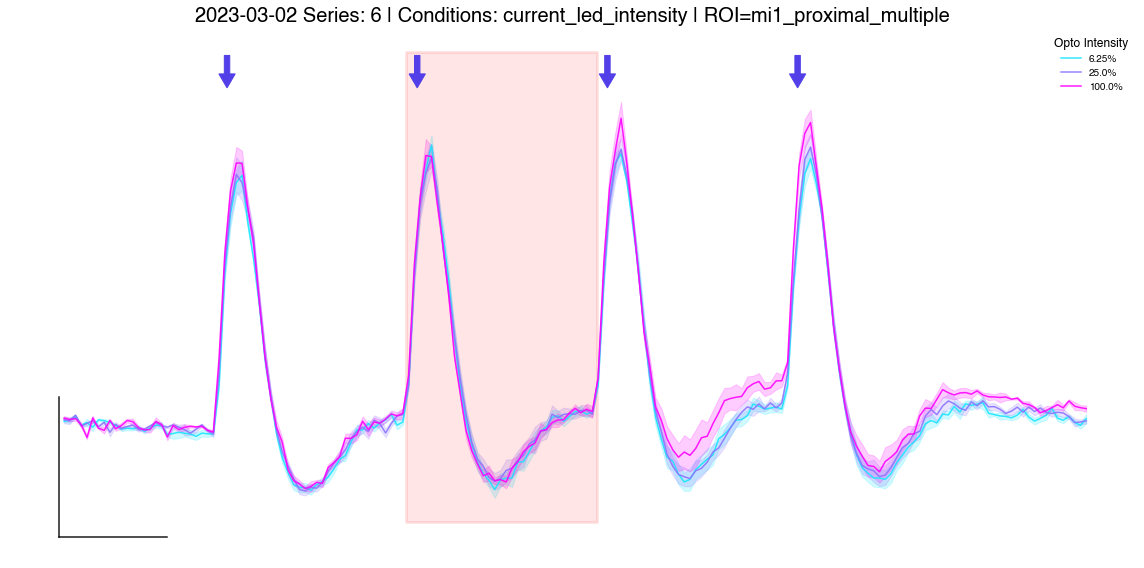

In [182]:
# FIGURE 4B. Good experimental example
plotFlashWithOptoStepTrial(mi1_prox_all[7])

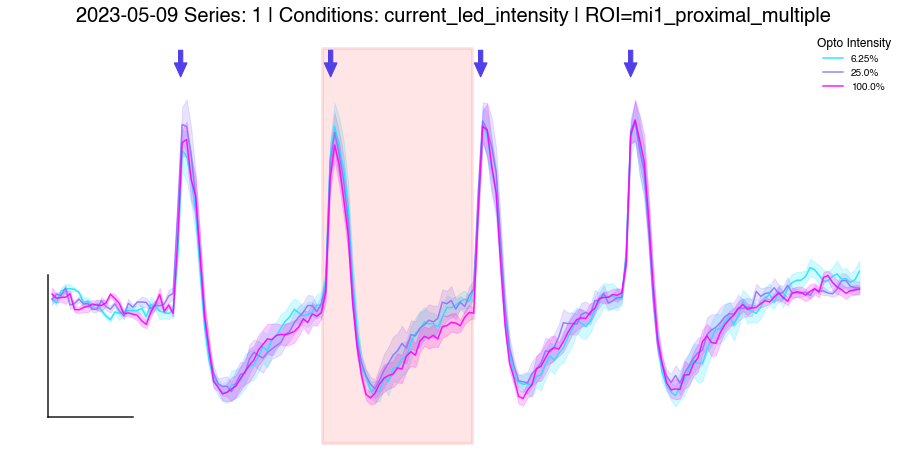

In [119]:
# Good control example
plotFlashWithOptoStepTrial(mi1_control_prox[2], save_fig=True)

In [158]:
# Function to pull and concatenate ROI data across a list of layers for an experiment type
def pullAndConcatenateROIdata(which_layer, silent=True):
    file_path = os.path.join(which_layer[0], which_layer[1] + ".hdf5")
    ID = imaging_data.ImagingDataObject(file_path, which_layer[2], quiet=True)
    roi_data = ID.getRoiResponses(which_layer[3])
    _, mean_response, _, _ = ID.getTrialAverages(roi_data.get('epoch_response'), parameter_key='current_led_intensity')
    
    if silent == False:
        print(f'The shape of the mean_response array is {mean_response.shape}')

    # if less than 181 timepoints, pad with NaNs
    if mean_response.shape[2] < 181:
        mean_response = np.pad(mean_response, ((0,0),(0,0),(0,181-mean_response.shape[2])), mode='constant', constant_values=np.nan)
        if silent == False:
            print(f'Padded mean_response array to shape {mean_response.shape}')
    return mean_response

# call pullAndConcatenateROIdata() for each layer in a list of layers
def concatenateROIdata(which_layers, silent=False):
    roi_data = []
    for count, layer in enumerate(which_layers):
        if silent == False:
            # Print progress
            print(f'Starting layer {count} of {len(which_layers)}')
            print(f'Layer: {layer}')

        # if first iteration of loop, set roi_data to the first layer's data
        if len(roi_data) == 0:
            roi_data = pullAndConcatenateROIdata(layer, silent=False)
        # if not first iteration, append the next layer's data to the existing roi_data
        else:
            roi_data = np.append(roi_data, pullAndConcatenateROIdata(layer), axis=0)
    print('\n')

    print('Shape of roi_data: ', roi_data.shape)
    return roi_data

    


In [159]:
roi_data_prox_control = concatenateROIdata(mi1_control_prox, silent=False)
roi_data_prox_exp = concatenateROIdata(mi1_prox_good, silent=False)

Starting layer 0 of 5
Layer: ['/Volumes/ABK2TBData/data_repo/bruker/20230317' '2023-03-17' '4'
 'mi1_proximal_multiple_morebi']
The shape of the mean_response array is (5, 3, 179)
Padded mean_response array to shape (5, 3, 181)
Starting layer 1 of 5
Layer: ['/Volumes/ABK2TBData/data_repo/bruker/20230317' '2023-03-17' '5'
 'mi1_proximal_multiple']
Starting layer 2 of 5
Layer: ['/Volumes/ABK2TBData/data_repo/bruker/20230509.selected' '2023-05-09' '1'
 'mi1_proximal_multiple']
Starting layer 3 of 5
Layer: ['/Volumes/ABK2TBData/data_repo/bruker/20230509.selected' '2023-05-09' '2'
 'mi1_proximal_multiple']
Starting layer 4 of 5
Layer: ['/Volumes/ABK2TBData/data_repo/bruker/20230509.selected' '2023-05-09' '6'
 'mi1_proximal_multiple']


Shape of roi_data:  (27, 3, 181)
Starting layer 0 of 11
Layer: ['/Volumes/ABK2TBData/data_repo/bruker/20230302' '2023-03-02' '8'
 'mi1_proximal_multiple']
The shape of the mean_response array is (6, 3, 179)
Padded mean_response array to shape (6, 3, 181)
Star

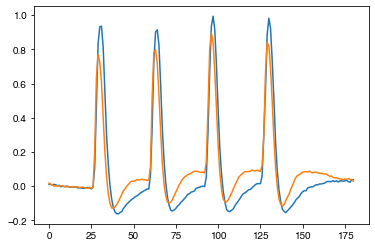

In [153]:
plt.plot(np.nanmean(roi_data_prox_control, axis=0))
plt.plot(np.nanmean(roi_data_prox_exp, axis=0))

/var/folders/3p/hy9qyl4j55bb44d1rgb4pz700000gn/T/ipykernel_38302/4252490186.py:3: RuntimeWarning: Mean of empty slice
  roi_data_control_12 = np.nanmean(roi_data_prox_control[:, 1:2, :], axis=1)
/var/folders/3p/hy9qyl4j55bb44d1rgb4pz700000gn/T/ipykernel_38302/4252490186.py:4: RuntimeWarning: Mean of empty slice
  roi_data_exp_12 = np.nanmean(roi_data_prox_exp[:, 1:2, :], axis=1)


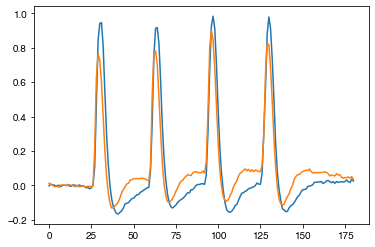

In [162]:
# Only look at the second two opto intensities

roi_data_control_12 = np.nanmean(roi_data_prox_control[:, 1:2, :], axis=1)
roi_data_exp_12 = np.nanmean(roi_data_prox_exp[:, 1:2, :], axis=1)

plt.plot(np.nanmean(roi_data_control_12, axis=0))
plt.plot(np.nanmean(roi_data_exp_12, axis=0))

## New Plotting Function for Figure 4C

Experimental vs Control Data, averaged across ROIs, not flies.
- First fig panel is each opto condition, subplot style
- Second could be averaged across opto intensity 2 and 3 and plotting the exp and control against each other
- Third is same as second but would normalize their responses to the first flash 


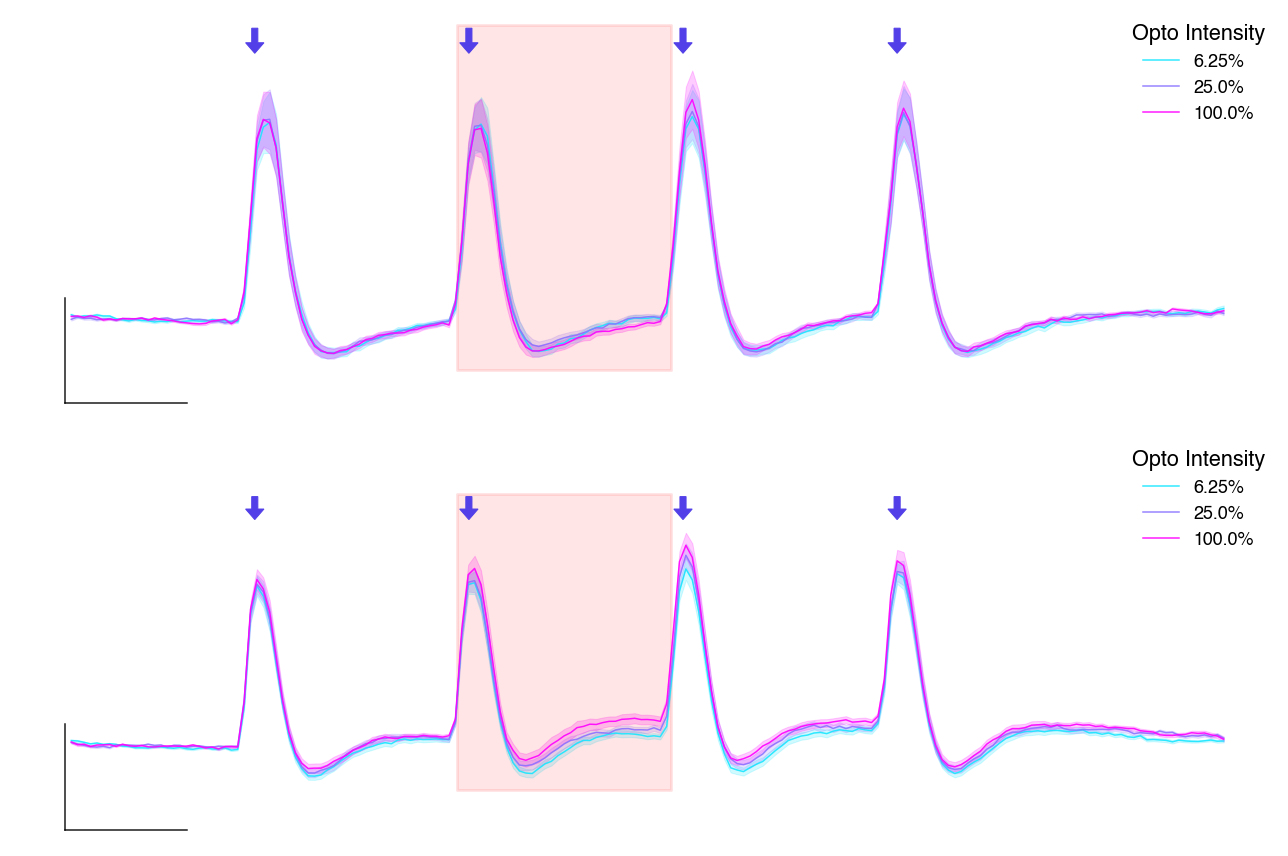

In [192]:
save_fig = True
figsize = (18, 12)

# Calculate the mean and SEM of mean_response across ROIs for roi_data_prox_control and roi_data_prox_exp
roi_data_prox_control_mean = np.nanmean(roi_data_prox_control, axis=0)
roi_data_prox_control_sem = np.nanstd(roi_data_prox_control, axis=0) / np.sqrt(roi_data_prox_control.shape[0])
roi_data_prox_control_sem_plus = roi_data_prox_control_mean + roi_data_prox_control_sem
roi_data_prox_control_sem_minus = roi_data_prox_control_mean - roi_data_prox_control_sem
roi_data_prox_exp_mean = np.nanmean(roi_data_prox_exp, axis=0)
roi_data_prox_exp_sem = np.nanstd(roi_data_prox_exp, axis=0) / np.sqrt(roi_data_prox_exp.shape[0])
roi_data_prox_exp_sem_plus = roi_data_prox_exp_mean + roi_data_prox_exp_sem
roi_data_prox_exp_sem_minus = roi_data_prox_exp_mean - roi_data_prox_exp_sem


# finding vis flash and opto flash locations
# loading in a random good file to get the flash start and end times
file_path = os.path.join(mi1_fly24_prox[0][0], mi1_fly24_prox[0][1] + ".hdf5")
ID = imaging_data.ImagingDataObject(file_path, mi1_fly24_prox[0][2], quiet=True)
roi_data = ID.getRoiResponses(mi1_fly24_prox[0][3])
unique_parameter_values, _, _, _ = ID.getTrialAverages(roi_data.get('epoch_response'), parameter_key='current_led_intensity')
flash_start, flash_end = visFlash(ID)
min_val_control = np.min(roi_data_prox_control_sem_minus)
max_val_control = np.max(roi_data_prox_control_sem_plus)
min_val_exp = np.min(roi_data_prox_exp_sem_minus)
max_val_exp = np.max(roi_data_prox_exp_sem_plus)
min_val = np.min([min_val_control, min_val_exp])
max_val = np.max([max_val_control, max_val_exp])
y_low_control = min_val_control-abs(0.22*min_val_control)
y_high_control = max_val_control+abs(0.17*max_val_control)
y_low_exp = min_val_exp-abs(0.22*min_val_exp)
y_high_exp = max_val_exp+abs(0.17*max_val_exp)
y_low = np.min([y_low_control, y_low_exp])
y_high = np.max([y_high_control, y_high_exp])

# for opto led plotting
led_start_time = ID.getRunParameters('pre_time')+ID.getRunParameters('led_time')
led_end_time = led_start_time + ID.getRunParameters('led_duration')        


# Figure plotting!
cmap = plt.get_cmap('cool') # also 'cool' 'winter' 'PRGn' 'Pastel1' 'YlGnBu' 'twilight'
colors = [cmap(i) for i in np.linspace(0.1, 1.0, len(unique_parameter_values))]

fh, ax = plt.subplots(2, 1, figsize=figsize, sharex=True, sharey=True)

# Plotting the mean response across ROIs for each opto intensity
for up_ind, up in enumerate(unique_parameter_values):
    # Plotting the mean response across ROIs for each opto intensity
    ax[0].plot(roi_data['time_vector'], roi_data_prox_control_mean[up_ind, :], color=colors[up_ind], alpha=0.9, label=opto_values[up_ind])
    ax[0].fill_between(roi_data['time_vector'], roi_data_prox_control_sem_plus[up_ind, :],
                          roi_data_prox_control_sem_minus[up_ind, :],
                            color=colors[up_ind], alpha=0.2)
    ax[1].plot(roi_data['time_vector'], roi_data_prox_exp_mean[up_ind, :], color=colors[up_ind], alpha=0.9, label=opto_values[up_ind])
    ax[1].fill_between(roi_data['time_vector'], roi_data_prox_exp_sem_plus[up_ind, :],
                            roi_data_prox_exp_sem_minus[up_ind, :],
                            color=colors[up_ind], alpha=0.2)

# for each axis, plot the visual stim flashes and opto stim
for ax_ind in range(len(ax)):
    # if shared_vis_opto_plot == True;
        # # VISUAL flash stim plotting
        # for vis_ind in range(len(flash_start)):
        #     ax[ax_ind].arrow(flash_start[vis_ind], y_high, 
        #                 0, y_high*-0.05, 
        #                 width=0.1,
        #                 head_length=0.05,
        #                 color=paleDarkBlue,
        #                 )
        # # OPTO stim plotting
        # ax[ax_ind].fill_between([led_start_time, led_end_time], y_low*1.05, y_high*1.01, 
        #                 alpha=0.1, edgecolor='r', facecolor='r', linewidth=3,)
    # Legend, Grid, Axis
    ax[ax_ind].legend(loc="upper right", fontsize=1*figsize[0], frameon=False, title='Opto Intensity', title_fontsize=1.2*figsize[0])
    #ax[ax_ind].legend(loc="upper right", frameon=False, title='Opto Intensity',)

    ax[ax_ind].set_xlabel('Time in Seconds')
    ax[ax_ind].set_ylabel('DF/F')
    
    # Plotting function stuff
    plot_tools.cleanAxes(ax[ax_ind])
    plot_tools.addScaleBars(ax[ax_ind], dT=2, dF=0.5, T_value=-0.1, F_value=-0.4)

# Opto stim plotting
ax[0].fill_between([led_start_time, led_end_time], y_low_control*1.05, y_high_control*1.01,
                    alpha=0.1, edgecolor='r', facecolor='r', linewidth=3,)
ax[1].fill_between([led_start_time, led_end_time], y_low_exp*1.05, y_high_exp*1.01,
                    alpha=0.1, edgecolor='r', facecolor='r', linewidth=3,)
# Visual flash stim plotting
for vis_ind in range(len(flash_start)):
    ax[0].arrow(flash_start[vis_ind], y_high_control, 
                0, y_high_control*-0.05, 
                width=0.1,
                head_length=0.05,
                color=paleDarkBlue,
                )
    ax[1].arrow(flash_start[vis_ind], y_high_exp,
                0, y_high_exp*-0.05,
                width=0.1,
                head_length=0.05,
                color=paleDarkBlue,
                )


fh.set_tight_layout(True)


if save_fig == True:
    fh.savefig(
    save_directory
    + "4C.AverageTracesCrossCondition.ByROI"
    + ".pdf",
    dpi=300, bbox_inches='tight', transparent=True,
    )

## 4C a different way

Averaging arcross last two opto intentsities

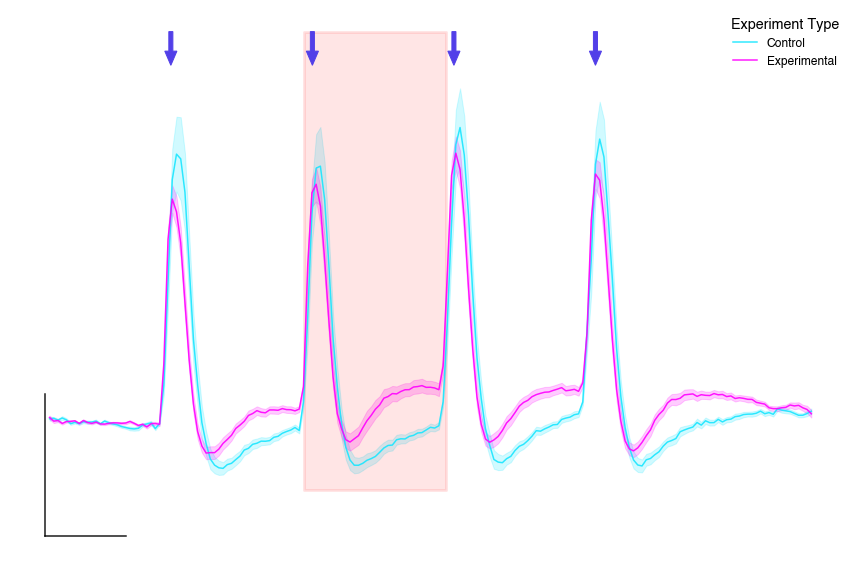

In [203]:
# Calculate the mean and SEM across the second two opto intensities for roi_data_prox_control and roi_data_prox_exp
con_mean_opto23 = np.nanmean(roi_data_prox_control[:, 2:3, :], axis=0)
con_sem_opto23 = np.nanstd(roi_data_prox_control[:, 2:3, :], axis=0) / np.sqrt(np.sum(~np.isnan(roi_data_prox_control[:, 2:3, :]), axis=0))
exp_mean_opto23 = np.nanmean(roi_data_prox_exp[:, 2:3, :], axis=0)
exp_sem_opto23 = np.nanstd(roi_data_prox_exp[:, 2:3, :], axis=0) / np.sqrt(np.sum(~np.isnan(roi_data_prox_exp[:, 2:3, :]), axis=0))

# Figure plotting!
save_fig = False
figsize = (12, 8)

cmap = plt.get_cmap('cool') # also 'cool' 'winter' 'PRGn' 'Pastel1' 'YlGnBu' 'twilight'
colors = [cmap(i) for i in np.linspace(0.1, 1.0, 2)]

fh, ax = plt.subplots(1, 1, figsize=figsize, sharex=True, sharey=True)
# Plotting the mean and sem for control and opto data
ax.plot(roi_data['time_vector'], con_mean_opto23[0, :], color=colors[0], alpha=0.9, label='Control')
ax.fill_between(roi_data['time_vector'], con_mean_opto23[0, :] + con_sem_opto23[0, :],
                    con_mean_opto23[0, :] - con_sem_opto23[0, :], color=colors[0], alpha=0.2)
ax.plot(roi_data['time_vector'], exp_mean_opto23[0, :], color=colors[1], alpha=0.9, label='Opto Activation')
ax.fill_between(roi_data['time_vector'], exp_mean_opto23[0, :] + exp_sem_opto23[0, :],
                    exp_mean_opto23[0, :] - exp_sem_opto23[0, :], color=colors[1], alpha=0.2)

# Opto stim plotting
ax.fill_between([led_start_time, led_end_time], y_low_control*1.03, y_high_control*1.0,
                    alpha=0.1, edgecolor='r', facecolor='r', linewidth=3,)
# Visual flash stim plotting
for vis_ind in range(len(flash_start)):
    ax.arrow(flash_start[vis_ind], y_high_control, 
                0, y_high_control*-0.05, 
                width=0.1,
                head_length=0.05,
                color=paleDarkBlue,
                )
    
# Legend, Grid, Axis
plot_tools.cleanAxes(ax)
ax.legend(loc="upper right", fontsize=1*figsize[0], frameon=False, title='Experiment Type', title_fontsize=1.2*figsize[0])
ax.set_xlabel('Time in Seconds')
ax.set_ylabel('DF/F')
# Plotting function stuff
plot_tools.addScaleBars(ax, dT=2, dF=0.5, T_value=-0.1, F_value=-0.4)

fh.set_tight_layout(True)

if save_fig == True:
    fh.savefig(
    save_directory
    + "4C.AverageTracesOpto23.ByROI"
    + ".pdf",
    dpi=300, bbox_inches='tight', transparent=True,
    )

In [204]:
roi_data_prox_control

array([[[ 5.73855426e-03, -1.47018110e-03, -2.61127736e-03, ...,
         -6.79335280e-03,             nan,             nan],
        [ 4.18010596e-03,  2.58329627e-02,  2.01944689e-02, ...,
         -6.59141197e-03,             nan,             nan],
        [-2.29104935e-02,  3.40806631e-03,  1.04427938e-02, ...,
          3.99438258e-02,             nan,             nan]],

       [[ 1.61621203e-02,  2.31089477e-03,  3.40760687e-04, ...,
          2.46361585e-02,             nan,             nan],
        [ 1.44100921e-03,  3.71427449e-02,  2.22460139e-02, ...,
          1.16233161e-01,             nan,             nan],
        [-1.12994065e-02, -1.64056476e-03,  3.07234985e-02, ...,
          1.59967024e-03,             nan,             nan]],

       [[ 3.75948611e-02, -1.50943318e-02,  1.07890737e-02, ...,
          1.54444153e-02,             nan,             nan],
        [ 2.40683364e-02,  2.03446726e-02,  2.32572436e-02, ...,
          2.56477713e-02,             nan,       

In [205]:
roi_data_prox_control.shape

(27, 3, 181)

In [206]:
test = np.nanmean(roi_data_prox_control[:, 2:3, :], axis=0)

In [216]:
test2 = np.nanmean(roi_data_prox_control[:, 1:3, :], axis=0)

In [217]:
test2

array([[-2.11862927e-03,  8.98660730e-03,  1.97377303e-03,
         3.09205260e-03, -4.38416986e-03, -1.78740309e-04,
         6.96675019e-04, -7.09541000e-03,  1.50447307e-03,
         1.21922031e-03, -6.69601648e-04,  3.68770438e-03,
        -2.06968605e-03, -5.57921453e-03,  1.77944527e-03,
         3.89132038e-03, -4.52422189e-03, -1.73116146e-03,
         3.05373791e-03, -2.88210402e-03, -2.38068932e-03,
        -5.44565653e-03, -1.38580754e-02, -1.11873127e-02,
        -1.95770744e-02, -1.41202418e-02,  2.53546016e-03,
         1.09641249e-01,  4.72958767e-01,  8.41112094e-01,
         9.40831392e-01,  9.45647845e-01,  8.08720798e-01,
         5.45675438e-01,  3.02447417e-01,  1.26365098e-01,
         2.21083338e-03, -7.70531347e-02, -1.22919420e-01,
        -1.47292004e-01, -1.63261725e-01, -1.65164894e-01,
        -1.56127246e-01, -1.46369254e-01, -1.29961195e-01,
        -1.05966271e-01, -1.03719365e-01, -9.95149735e-02,
        -8.73174894e-02, -7.57243548e-02, -7.42718787e-0